## Kaggle(Knowledge) - Digit Recognizer ##
* 2021.12.22 ~

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

Load Data

In [2]:
train = pd.read_csv("./train.csv")
# print(train.shape)
# train.head()

In [3]:
test = pd.read_csv("./test.csv")
# print(test.shape)
# test.head()

In [4]:
Y_train = train['label']
X_train = train.drop(labels=['label'], axis=1)

/Users/oez/miniforge3/envs/tf25/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

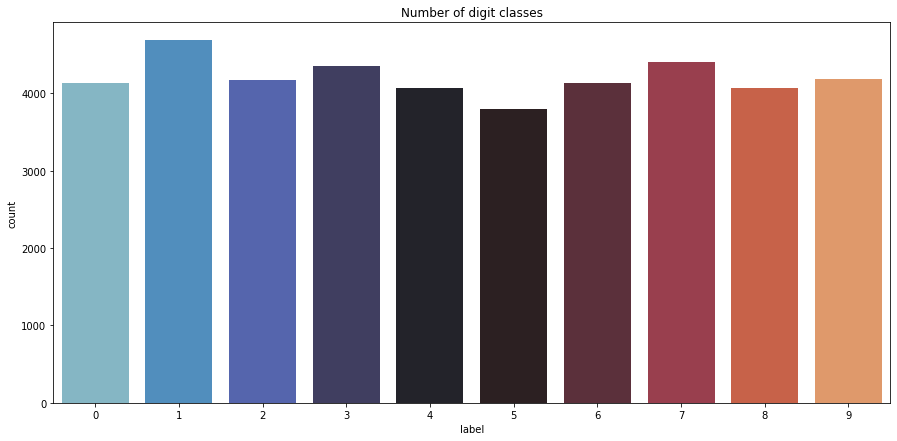

In [5]:
plt.figure(figsize=(15, 7))
g = sns.countplot(Y_train, palette='icefire')
plt.title('Number of digit classes')
Y_train.value_counts()

In [6]:
# Normalize
X_train = X_train / 255.0
test = test / 255.0

print('X_train shape', X_train.shape)
print('test shape', test.shape)

X_train shape (42000, 784)
test shape (28000, 784)


In [7]:
# Reshape
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

print('X_train shape', X_train.shape)
print('test shape', test.shape)

X_train shape (42000, 28, 28, 1)
test shape (28000, 28, 28, 1)


In [8]:
# Label Encoding
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

In [9]:
# Split the data set
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


In [10]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Metal device set to: Apple M1


2021-12-27 20:02:08.793948: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-27 20:02:08.794535: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [12]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [13]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [14]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [15]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

/var/folders/97/nvxcs56s19v2tp49qjhhc02h0000gn/T/ipykernel_49471/1235084826.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
2021-12-27 20:02:09.098811: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10


2021-12-27 20:02:09.309733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


150/151 [============================>.] - ETA: 0s - loss: 0.6823 - accuracy: 0.7776

2021-12-27 20:02:15.551443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


151/151 [==============================] - 7s 31ms/step - loss: 0.6801 - accuracy: 0.7784 - val_loss: 2.5083 - val_accuracy: 0.3817
Epoch 2/10
151/151 [==============================] - 4s 24ms/step - loss: 0.2342 - accuracy: 0.9246 - val_loss: 1.2019 - val_accuracy: 0.6400
Epoch 3/10
151/151 [==============================] - 4s 24ms/step - loss: 0.1705 - accuracy: 0.9466 - val_loss: 0.1419 - val_accuracy: 0.9560
Epoch 4/10
151/151 [==============================] - 4s 24ms/step - loss: 0.1425 - accuracy: 0.9565 - val_loss: 0.0512 - val_accuracy: 0.9852
Epoch 5/10
151/151 [==============================] - 4s 24ms/step - loss: 0.1283 - accuracy: 0.9603 - val_loss: 0.0464 - val_accuracy: 0.9874
Epoch 6/10
151/151 [==============================] - 4s 24ms/step - loss: 0.1199 - accuracy: 0.9631 - val_loss: 0.0431 - val_accuracy: 0.9864
Epoch 7/10
151/151 [==============================] - 4s 24ms/step - loss: 0.1061 - accuracy: 0.9680 - val_loss: 0.0412 - val_accuracy: 0.9888
Epoch 8/10

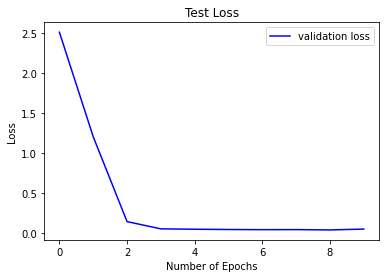

In [16]:
# Evaluate
# Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

2021-12-27 20:02:49.624625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


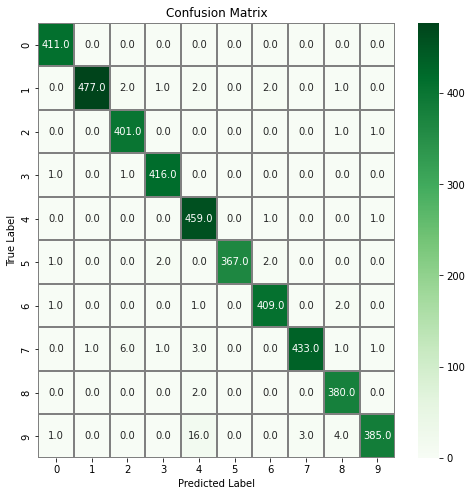

In [17]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [18]:
final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0485, final accuracy: 0.9852


In [19]:
test_file = "./test.csv"
mnist_testset = np.loadtxt(test_file, skiprows=1, dtype='int', delimiter=',')
x_test = mnist_testset.astype("float32")
x_test = x_test.reshape(-1, 28, 28, 1)/255.

In [20]:
y_hat = model.predict(x_test, batch_size=64)

In [21]:
y_pred = np.argmax(y_hat,axis=1)

In [22]:
output_file = "./submission3.csv"
with open(output_file, 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))